## Directed graph symmetrization

Fitch, K. (2018). Metric preserving directed graph symmetrization, 1–16. Retrieved from http://arxiv.org/abs/1802.09829

Strongly connected, positively weighted graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g = nx.balanced_tree(create_using=nx.DiGraph(), h=2, r=2)

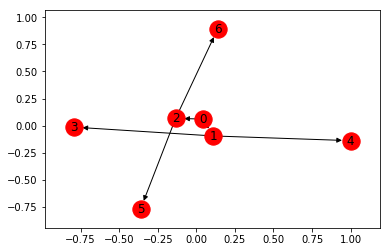

In [3]:
nx.draw_networkx(g)

Compute the Laplacian for the graph.

In [4]:
N = nx.number_of_nodes(g)
A = nx.adjacency_matrix(g).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

6

Orthonormal basis 
$Q \in \mathbb{R}^{(N-1)\times N}$

$Q$ is the orthonormal basis of the nullspace of $\mathbf{1}_N$, i.e., $\mathcal{N}(\mathbf{1}_N)$

In [5]:
from scipy.linalg import null_space

In [6]:
Q = null_space(np.ones((N,N))).transpose()

$Q\mathbf{1}_n = \mathbf{0}$

In [7]:
np.printoptions(suppress=True)
np.sum(Q, axis=1)

array([-1.66533454e-16,  1.66533454e-16, -1.11022302e-16,  1.11022302e-16,
        0.00000000e+00,  0.00000000e+00])

$QQ^T = I_{(n-1)}$

In [8]:
print(np.matmul(Q, np.transpose(Q)))

[[ 1.00000000e+00 -2.23597688e-17  1.33675531e-17 -2.16219739e-18
   1.85660735e-19  9.90194323e-19]
 [-2.23597688e-17  1.00000000e+00 -7.28359248e-17 -5.76728506e-17
   7.37748427e-18 -9.57648415e-18]
 [ 1.33675531e-17 -7.28359248e-17  1.00000000e+00 -3.54851499e-16
   8.46049395e-18 -1.39693750e-17]
 [-2.16219739e-18 -5.76728506e-17 -3.54851499e-16  1.00000000e+00
  -1.85959823e-16 -1.88574792e-17]
 [ 1.85660735e-19  7.37748427e-18  8.46049395e-18 -1.85959823e-16
   1.00000000e+00 -1.42019186e-16]
 [ 9.90194323e-19 -9.57648415e-18 -1.39693750e-17 -1.88574792e-17
  -1.42019186e-16  1.00000000e+00]]


Compute Reduced Laplacian

$\bar{L} = QLQ^T$

In [9]:
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))

In [10]:
rL - np.transpose(rL)

matrix([[ 0.00000000e+00,  1.01418511e+00, -1.24211801e+00,
          1.47415560e-16,  2.28479933e-17,  9.90194323e-19],
        [-1.01418511e+00,  0.00000000e+00,  2.22044605e-16,
         -6.32455532e-01,  8.94427191e-01,  8.63412700e-17],
        [ 1.24211801e+00, -2.22044605e-16,  0.00000000e+00,
         -5.16397779e-01,  7.30296743e-01,  6.54017076e-17],
        [-1.47415560e-16,  6.32455532e-01,  5.16397779e-01,
          0.00000000e+00, -1.79009300e-16, -2.10209437e-17],
        [-2.28479933e-17, -8.94427191e-01, -7.30296743e-01,
          1.79009300e-16,  0.00000000e+00,  0.00000000e+00],
        [-9.90194323e-19, -8.63412700e-17, -6.54017076e-17,
          2.10209437e-17,  0.00000000e+00,  0.00000000e+00]])

Solve the Lyapunov equation
$\bar { L } \Sigma + \Sigma \bar { L } ^ { T } = I _ { n - 1 }$

In [11]:
from scipy.linalg import solve_lyapunov

In [12]:
sigma = solve_lyapunov(rL, np.identity(N-1))

Project from $\mathbb { R } ^ { ( n - 1 ) \times ( n - 1 ) }$ to $\mathbb { R } ^ { n \times n }$ by $X = 2 Q ^ { T } \Sigma Q$

In [13]:
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))

Pseudoinverse $\hat { L } _ { u } = X ^ { + }$ gives the equivalent Laplacian

In [14]:
eqL = np.linalg.pinv(x)

In [15]:
np.shape(eqL)

(7, 7)

In [16]:
np.linalg.matrix_rank(eqL)

6

Check eigenvalues of both Laplacian matrices

In [17]:
u1, s1, v1 = np.linalg.svd(L)
s1

array([2.10100299e+00, 1.93185165e+00, 1.25928013e+00, 1.00000000e+00,
       1.00000000e+00, 5.17638090e-01, 8.90158753e-17])

In [18]:
u2, s2, v2 = np.linalg.svd(eqL)
s2

array([1.62554324e+00, 1.57735027e+00, 1.00000000e+00, 1.00000000e+00,
       4.22649731e-01, 3.74456758e-01, 2.55080042e-17])

### Comparison to the linear model

In [20]:
from scipy.integrate import solve_ivp

In [21]:
init = np.random.rand(N)
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,20], y0=init)
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,20], y0=init)

In [22]:
np.mean(init)

0.5744019484494238

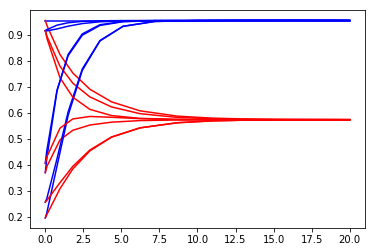

In [23]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:], color="blue", label="")
    plt.plot(res2.t, res2.y[i,:], color="red")